### Data Load

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
os.getcwd()

'C:\\AI\\Python 3.8\\venv\\comp\\iris\\iris'

In [59]:
df = pd.read_csv('./gg_titanic.csv')

### EDA

### 모델 생성 및 평가

In [4]:
X = df[df.columns.difference(['Survived'])]
y= df['Survived']

In [5]:
from  sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.1
)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(801, 8) (90, 8) (801,) (90,)


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_test)
f1 = f1_score(y_test,pred,average='macro')

print(f1)

0.8393676695563488


### XGBoost Wrapper - python
* XGBoost는 분류와 회귀 모두 가능 <br>
ref) https://xgboost.readthedocs.io/en/stable/

In [63]:
import xgboost as xgb
from xgboost import plot_importance

In [ ]:
#에러
X = df[df.columns.difference(['class'])]
y= df['class']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

dm_train = xgb.DMatrix(data=X_train,label=y_train)
dm_test = xgb.DMatrix(data=X_test,label=y_test) 

my_param = {'max_depth':5,'eta':0.3, 'objective':'binary:logistic', 
            'num_class':3,'eval_metric': 'auc','early_stoppings':100} 

#num_boost_around = 10
wlist = [(dm_train,'train'),(dm_test,'eval')]
train_object = xgb.train(my_param, dm_train, num_boost_round=10,evals=wlist)
proba = train_object.predict(dm_test)
print(proba)

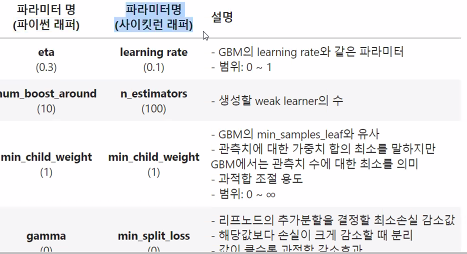
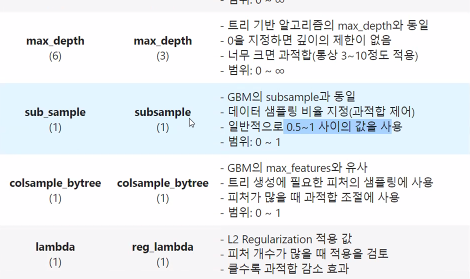
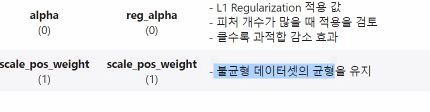

#### 학습 관련
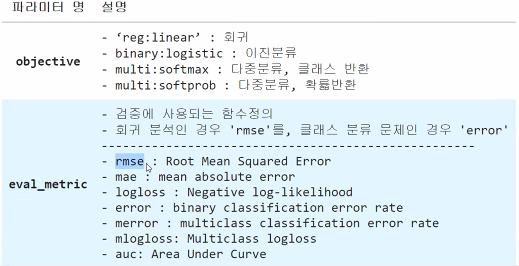

#### 주요 파라미터- 과적합 관련

<pre>
Early Stopping :  과적합 시 학습 멈추기 기능

**eta : 작게
subsample : 작게 
colsample_bytree : 작게
max_depth : 작게

**gamma : 크게
min_child_weight : 크게
num_boost_round(n_estimator) : 크게

### XGBoost Wrapper - sklearn

In [17]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix
X = df[df.columns.difference(['Survived'])]
y= df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

model = XGBClassifier(n_estimators=100,learning_rate=0.1,max_depth=5)

#model = RadomForestClassifier()

model.fit(X_train,y_train)
pred = model.predict(X_test)

accuracy = accuracy_score(y_test,pred)
f1 = f1_score(y_test,pred,average='macro')
print(f"f1:{f1:4f} accuracy:{accuracy:.4f}")

cm = confusion_matrix(y_test,pred)
print(cm)

(801, 8) (90, 8) (801,) (90,)
[15:08:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
f1:0.861111 accuracy:0.8667
[[48  6]
 [ 6 30]]


c:\ai\python 3.8\venv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


### feature importance

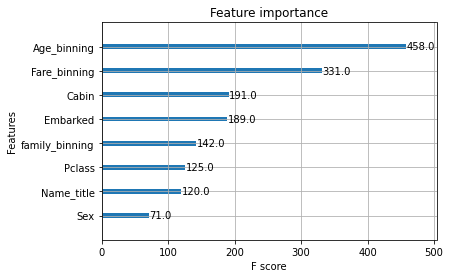

In [18]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(model)
plt.show()

### LightGBM

ref) https://lightgbm.readthedocs.io/en/latest/ </br>
https://github.com/microsoft/LightGBM/blob/master/examples/python-guide/sklearn_example.py

In [15]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix

import lightgbm as lgb
from lightgbm import LGBMClassifier

X = df[df.columns.difference(['Survived'])]
y= df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=100)
                                                
model = LGBMClassifier(max_depth=5,learning_rate=0.1,n_estimators=100,
                      random_state=100)
model.fit(X_train,y_train)
pred = model.predict(X_test)
                     
accuracy = accuracy_score(y_test,pred)
f1 = f1_score(y_test,pred,average='macro')
print(f"f1:{f1:4f} accuracy:{accuracy:.4f}")

cm = confusion_matrix(y_test,pred)
print(cm)
            




f1:0.797913 accuracy:0.8111
[[48  6]
 [11 25]]


### Ensemble Voting

In [25]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

model = VotingClassifier([('rf',RandomForestClassifier()),('lr',LogisticRegression())],
                                                          voting = 'hard')

model.fit(X_train,y_train)
pred = model.predict(X_test)
                     
accuracy = accuracy_score(y_test,pred)
f1 = f1_score(y_test,pred,average='macro')
print(f"f1:{f1:4f} accuracy:{accuracy:.4f}")


f1:0.847239 accuracy:0.8556


### Ensemble Bagging

In [19]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators = 10,
                 max_samples=1.0, max_features=1.0,
                  bootstrap=True,oob_score=False,random_state=100)

model.fit(X_train,y_train)
pred = model.predict(X_test)
                     
accuracy = accuracy_score(y_test,pred)
f1 = f1_score(y_test,pred,average='macro')
print(f"f1:{f1:4f} accuracy:{accuracy:.4f}")

[15:11:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
f1:0.861111 accuracy:0.8667


c:\ai\python 3.8\venv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


### Stacking


https://lsjsj92.tistory.com/558 </br>
https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=ckdgus1433&logNo=221588139765

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
dt=DecisionTreeClassifier()
lg=LogisticRegression()

In [61]:
X = df.drop(['Survived'], axis=1)
y= df['Survived']

In [70]:
rf_yellow=np.zeros((X_train.shape[0],1))
lg_yellow=np.zeros((X_train.shape[0],1))
dt_yellow=np.zeros((X_train.shape[0],1))

In [72]:
rf_green=np.zeros((X_test.shape[0],5))
lg_green=np.zeros((X_test.shape[0],5))
dt_green=np.zeros((X_test.shape[0],5))

In [78]:
from sklearn.model_selection import StratifiedKFold
sk=StratifiedKFold(n_splits=5,shuffle=True, random_state=1000)
for i,(train_idx,val_idx) in enumerate(sk.split(X_train,y_train)):
    X_train_fold,y_train_fold = X_train.iloc[train_idx],y_train.iloc[train_idx]
    X_val_fold,y_val_fold = X_train.iloc[val_idx],y_train.iloc[val_idx]
    
    rf.fit(X_train_fold,y_train_fold)
    lg.fit(X_train_fold,y_train_fold)
    dt.fit(X_train_fold,y_train_fold)
    
    rf_pred=rf.predict(X_val_fold)
    lg_pred=lg.predict(X_val_fold)
    dt_pred=dt.predict(X_val_fold)
    
    rf_yellow[val_idx,:] = rf_pred.reshape(-1,1)
    lg_yellow[val_idx,:] = lg_pred.reshape(-1,1)
    dt_yellow[val_idx,:] = dt_pred.reshape(-1,1)
    
    # test
    rf_pred=rf.predict(X_test)
    lg_pred=lg.predict(X_test)
    dt_pred=dt.predict(X_test)
    
    rf_green[:,i] = rf_pred
    lg_green[:,i] = lg_pred
    dt_green[:,i] = dt_pred

rf_green_mean = np.mean(rf_green,axis=1).reshape(-1,1)
lg_green_mean = np.mean(lg_green,axis=1).reshape(-1,1)
dt_green_mean = np.mean(dt_green,axis=1).reshape(-1,1)

new_train = np.concatenate([rf_yellow,lg_yellow,dt_yellow],axis=1)
new_test = np.concatenate([rf_green_mean,lg_green_mean,dt_green_mean],axis=1)

print(new_train.shape, new_test.shape)

(801, 3) (90, 3)


In [79]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(max_depth=5,learning_rate=0.1,n_estimators=100,
                      random_state=100)
model.fit(X_train,y_train)
pred = model.predict(X_test)

accuracy = accuracy_score(y_test,pred)
f1 = f1_score(y_test,pred,average='macro')
print(f"f1:{f1:4f} accuracy:{accuracy:.4f}")

f1:0.797913 accuracy:0.8111


### stacking classifier

In [90]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

model1 = [('rf',RandomForestClassifier()),('lr',LogisticRegression()),('dt',DecisionTreeClassifier())]
model2 = LGBMClassifier(max_depth=5,learning_rate=0.1,n_estimators=100,random_state=42)

stacking_model = StackingClassifier(estimators=model1,final_estimator=model2,cv=5)
stacking_model.fit(X_train,y_train)
pred= stacking_model.predict(X_test)
accuracy=accuracy_score(y_test,pred)
f1=f1_score(y_test,pred,average='macro')
print(f'f1:{f1:.4f} accuracy:{accuracy:.4f}')



f1:0.8217 accuracy:0.8333


In [84]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

model1 = [('rf',RandomForestClassifier()),('lr',LogisticRegression())]
model2 = RandomForestClassifier()

stacking_model = StackingClassifier(estimators=model1,final_estimator=model2,cv=5)
stacking_model.fit(X_train,y_train)
pred= stacking_model.predict(X_test)
accuracy=accuracy_score(y_test,pred)
f1=f1_score(y_test,pred,average='macro')
print(f'f1:{f1:.4f} accuracy:{accuracy:.4f}')


f1:0.8086 accuracy:0.8222


### Pipeline

<pre>
파이프라인을 사용하면 데이터 사전 처리 및 분류의 모든 단계를 포함하는 단일 개체를 만들 수 있다.

train과 test 데이터 손실을 피할 수 있다.
교차 검증 및 기타 모델 선택 유형을 쉽게 만든다.
재현성 증가


In [81]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

스케일링 및 다양한 모델 학습을 pipeline을 통해 한 번에 할 수 있다.

In [82]:
pipe = Pipeline([('scaling',StandardScaler()),('model',DecisionTreeClassifier())])
pipe.fit(X_train,y_train)
pred = pipe.predict(X_test)
                     
accuracy = accuracy_score(y_test,pred)
f1 = f1_score(y_test,pred)
print(f"f1:{f1:4f} accuracy:{accuracy:.4f}")

f1:0.794118 accuracy:0.8444


#### as is

#### to be